## Project file

### Data Exploration

In [899]:
from data import *
import data
from util import *
import warnings
columns = pd.read_csv('columns.csv')
responses = pd.read_csv('responses.csv')

Looking at the data

In [925]:
responses.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


## Checking correleation of some features  with Empathy

Checking correlation of Empathy with some of handpicked features

['Giving', 'Compassion to animals', 'Friends versus money', 'Final judgement', 'Self-criticism']


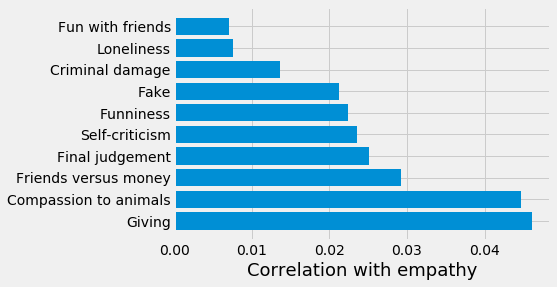

In [615]:
from sklearn.feature_selection import mutual_info_classif as mf
import matplotlib.pyplot as plt
#list of items that relate to emapthy
items_list = ['Fake','Compassion to animals','Final judgement','Giving', 'Friends versus money','Fun with friends','Criminal damage','Loneliness','Funniness','Self-criticism','Empathy']
empathy_data = responses.filter(items = items_list)
empathy_X = empathy_data.iloc[:,0:-1]
empathy_target = empathy_data.iloc[:,-1]
empathy_X, empathy_target = missing_values(empathy_X, empathy_target)
b = mf(empathy_X,empathy_target,discrete_features=[0,1,2,3,4,5,6,7,8,9])
a  = np.argsort(b)[::-1]
items_1 = [items_list[i] for i in a][:5]
#looking atthe best of 5 features
print(items_1)
plt.barh(np.arange(10),[b[i] for i in a],tick_label=[items_list[i] for i in a])
plt.xlabel('Correlation with empathy',fontsize=18)
plt.show()

The result seems to be intuitive to our understanding as the features like compassion, giving seems to be a lot correrelated to empathy but features like self-criticism and final judgment doesnn't seem to be intuitive.

# Preprocessing

In [878]:
import importlib
importlib.reload(util)
import preprocess as pr
x = data.Load()
y = pr.Preprocess()
X_train,Y_train,X_dev,Y_dev,X_test,Y_test = y.get_data()

preprocessing data


Training on decision tree

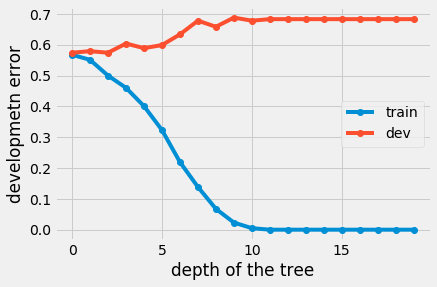

In [921]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
training_error = list()
development_error = list()
testing_error = list()
for i in range(1,21):
    dt = DecisionTreeClassifier(max_depth = i,random_state = 4)
    dt.fit(X_train,Y_train)
    training_error.append(1-np.mean(dt.predict(X_train) == Y_train))
    development_error.append(1-np.mean(dt.predict(X_dev) == Y_dev))
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
xs = np.arange(0,20)
p1 = plt.plot(xs,training_error, 'o-', label = 'train')
p2 = plt.plot(xs,development_error, 'o-', label = 'dev')
plt.legend(loc='right')
plt.xlabel("depth of the tree")    
plt.ylabel("developmetn error")
plt.show()

So based on the development data we would select the depth of 3 as the best depth , as after this point the development error seems to increase and the data seems to overfit.

### Baseline models

Decision trees

In [696]:
import importlib
import util as ut
importlib.reload(util)
tree =  ut.decision_tree(X_train,Y_train)
score = ut.prediction(tree,X_dev,Y_dev)
print(score)

0.4207920792079208


This is the accuracy of the deciosn trees

In [700]:
from util import *
importlib.reload(util)
svm1 = svm_wrapper(X_train,Y_train)
score = ut.prediction(svm1,X_dev,Y_dev)
print("SVM accuarcy: ",score)

SVM accuarcy:  0.35148514851485146


SVM seems to give result even worse than the baseline models. As the data is skewed towards label 3,4 and 5, it could be the reason that SVM is giving worse results

Based on the precisin, recall , it seems like data is skewed
######  
  Classification Report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         4
        2.0       0.00      0.00      0.00        11
        3.0       0.00      0.00      0.00        12
        4.0       0.30      0.18      0.23        39
        5.0       0.36      0.82      0.50        34


Naive bayes

In [927]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)
print(np.mean(clf.predict(X_dev) == Y_dev))

0.35148514851485146


Accuracy of naive Bayes seems to correlate that some of the features can be considered as independent of other

In [704]:
from util import *
importlib.reload(util)
mlp = mlp_wrapper(X_train, Y_train)
score = ut.prediction(mlp,X_dev,Y_dev)
print(score)

0.35148514851485146


MLP without any parameter tuning give score almost close to the baseline model

### Tuning the hyperparemeters of KNN

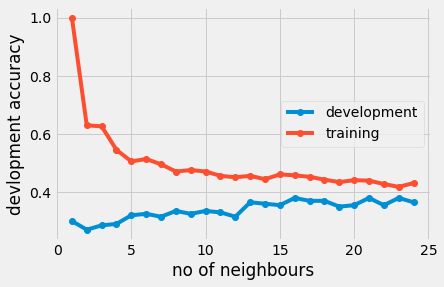

In [929]:
from util import *
import matplotlib.pyplot as plt
importlib.reload(util)
training_acc = []
dev_acc =[]
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_dev)
    dev_acc.append(np.mean(Y_pred == Y_dev))
    Y_pred_train = knn.predict(X_train)
    training_acc.append(np.mean(Y_train == Y_pred_train))
%matplotlib inline
plt.style.use("fivethirtyeight")
xs = np.arange(1,25)
p1 = plt.plot(xs,dev_acc ,'o-', label = 'development')
p2 = plt.plot(xs,training_acc, 'o-', label = 'training')
plt.legend(loc='right')
plt.xlabel("no of neighbours")    
plt.ylabel("devlopment accuracy")
plt.show()

#### So with only knn with n=6 that devlopment accuracy seems to decrease and after that model might overfit 

Trying bagging with decision tree and trying depth of different decision tree

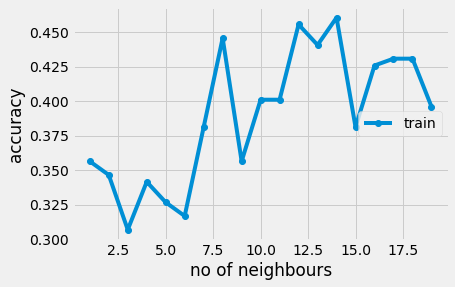

In [220]:
from util import *
import numpy as np
importlib.reload(util)
dev_acc = list()
for i in range(1,20):
    score,_ = bagging(X_train, Y_train, X_dev, Y_dev, i)
    dev_acc.append(score)
%matplotlib inline
plt.style.use("fivethirtyeight")
xs = np.arange(1,20)
p1 = plt.plot(xs,dev_acc, 'o-', label = 'train')
plt.legend(loc='right')
plt.xlabel("no of estimators")    
plt.ylabel("accuracy")
plt.show()

With no of estimator =14 seems to be the best parameter when bagging(with base element as trees).

### Plotting the scatterplot for PCA

In [637]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
X_embedded = TSNE(n_components=3).fit_transform(X_train)

pca = PCA(n_components=2)
#pca.fit(X_train)
pca_result = pca.fit_transform(X_train)
print(X_embedded.shape)
print(pca.explained_variance_ratio_)

(606, 3)
[0.75318698 0.13789891]


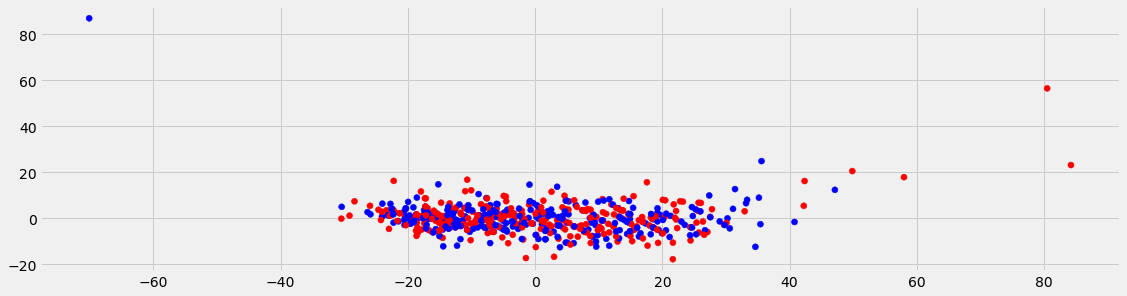

In [639]:
from ggplot import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
color = ['blue','red']
fig = plt.figure(figsize=(100,10 ))
ax = fig.add_subplot(251)
ax.scatter(pca_result[:,0], pca_result[:,1],color=color,cmap=plt.cm.Spectral)

### Trying bagging with dt as base model

In [931]:
from util import *
importlib.reload(util)
tree = decision_tree(X_train, Y_train) 
bag = BaggingClassifier(random_state= 4,base_estimator = tree)
bag.fit(X_train,Y_train)
Y_pred = bag.predict(X_dev)
score = accuracy_score(Y_dev,Y_pred)
print(score)

0.40594059405940597


#### Applying PCA with parameter tuning of decision trees. Finding accuarcy with different depth of decision tree

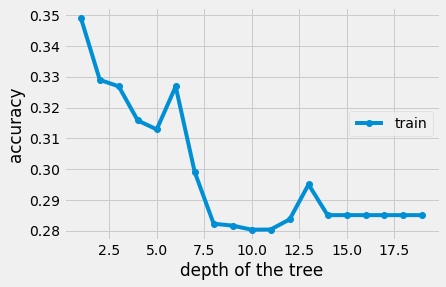

In [711]:
from sklearn.pipeline import Pipeline
score = [0]
for i in range(1,20):
    estimators1 = [('tree', PCA()), ('clf', DecisionTreeClassifier(max_depth =i,random_state = 4) )]
    pipe1 = Pipeline(estimators1)
    pipe1.fit(X_train,Y_train)
    Y_pred = pipe1.predict(X_dev)
    score.append(np.mean(Y_pred == Y_dev))
%matplotlib inline
plt.style.use("fivethirtyeight")
xs = np.arange(1,20)
p1 = plt.plot(xs,score[1:], 'o-', label = 'train')
plt.legend(loc='right')
plt.xlabel("depth of the tree")    
plt.ylabel("accuracy")
plt.show()

### Trying parameter tuning with grid search

#### Decison trees tuning

In [712]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'max_depth':np.arange(2,50)},
 ]
tree = GridSearchCV(DecisionTreeClassifier(),param_grid) 
tree.fit(X_train,Y_train)
Y_pred = tree.predict(X_dev)
print(np.mean(Y_pred == Y_dev))

0.34969610822468383


This gives the best possible accuracy of decision tree with best possible values of depth, based on training accuracy

#### knn Tuning

In [720]:
param_grid = [{'n_neighbors': np.arange(2,250,20)}]
knn = GridSearchCV(KNeighborsClassifier(),param_grid) 
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_dev)
print(np.mean(Y_pred == Y_dev))

0.3195765121066562


#####  SVM tuning

In [721]:
from sklearn.svm import SVC
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf']},]
svm = GridSearchCV(SVC(),param_grid)
svm.fit(X_train,Y_train)
Y_pred = svm.predict(X_dev)
print(np.mean(Y_pred == Y_dev))

0.3254827958043329


#### Tuning multi layer perceptron

In [722]:
from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(hidden_layer_sizes = (hidden_layer),activation = 'relu')
param_grid = [{'hidden_layer_sizes':np.arange(10,150,10),'max_iter':[30] ,'activation':['logistic', 'tanh','relu']}]
mlp_n = GridSearchCV(MLPClassifier(), param_grid)
mlp_n.fit(X_train,Y_train)
Y_pred = mlp_n.predict(X_dev)
print(np.mean(Y_pred==Y_dev))

0.35148514851485146


##### Bagging with decison trees

In [482]:
score = []
for i in range(1,5):
    dt = DecisionTreeClassifier(max_depth = i,random_state = 4)
    param_grid = [{'n_estimators': np.arange(1,30),'base_estimator':[dt]}]
    bag = GridSearchCV(BaggingClassifier(), param_grid)
    bag.fit(X_train, Y_train)
    Y_pred = bag.predict(X_dev)
    score.append(accuracy_score(Y_dev,Y_pred))
sc = np.sort(score)[::-1][0]
print("bagging with decision tree:", sc)

bagging with decision tree: 0.4306930693069307


Ensembling the bag model obtained as the base model to further ensemble

In [487]:
score1= []
param_grid = [{'n_estimators': np.arange(1,20),'base_estimator':[bag]}]
bagger = GridSearchCV(BaggingClassifier(), param_grid)
bag.fit(X_train, Y_train)
Y_pred = bag.predict(X_dev)
score1 = accuracy_score(Y_dev,Y_pred)
print(score1)

0.4405940594059406


So we can't see much of of an improvement with furthen ensembling

#### Tuning SVM

In [497]:
param_grid = [{'n_estimators': np.arange(5,6),'base_estimator':[svm]}]
svc1 = GridSearchCV(BaggingClassifier(), param_grid)
svc1.fit(X_train, Y_train)
Y_pred = svc1.predict(X_dev)
score1 = accuracy_score(Y_dev,Y_pred)
print(score1)

0.40594059405940597


svm with bagging takes lot of time, not much good of accuracy

### Voting clssifier of all the baseline models

In [572]:
from sklearn.ensemble import VotingClassifier
# param_grid = [{'estimators':[('dt', dt)]}]#,('svc', svm),('perc',perc)],}]#'voting':'hard','weights':[1,2,2]}]
# elcf1 = GridSearchCV(VotingClassifier(), param_grid)
eclf = VotingClassifier(estimators=[('dt', dt),('svc', svm),('perc',perc)], voting='hard', weights=[1,3,3]) #('svc', svm),('knn', knn)
eclf.fit(X_train, Y_train)
Y_pred = eclf.predict(X_dev)
score1 = accuracy_score(Y_dev,Y_pred)
print(score1)

0.44554455445544555


C:\Users\akshay\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\akshay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


It seem to give a better accuracy as compared to the indicidual accracy of the baseline models
Following was the accuracy of the baseline models individually
accuarcy  perceptron : 0.39
  Classification Report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         4
        2.0       0.00      0.00      0.00        11
        3.0       0.00      0.00      0.00        12
        4.0       0.39      1.00      0.56        39
        5.0       0.00      0.00      0.00        34

avg / total       0.15      0.39      0.22       100


accuarcy  knn : 0.35
  Classification Report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         4
        2.0       0.00      0.00      0.00        11
        3.0       0.00      0.00      0.00        12
        4.0       0.30      0.18      0.23        39
        5.0       0.36      0.82      0.50        34

avg / total       0.24      0.35      0.26       100


accuarcy  decision_tree : 0.33
  Classification Report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         4
        2.0       0.00      0.00      0.00        11
        3.0       0.19      0.42      0.26        12
        4.0       0.42      0.21      0.28        39
        5.0       0.37      0.59      0.45        34

avg / total       0.31      0.33      0.29       100


###### PCA with SVM

In [938]:
pipe = PCA_with_SVM(X_train,Y_train)
pipe.fit(X_train, Y_train)
Y_pred = pipe.predict(X_dev)
score = (np.mean(Y_pred == Y_dev))
print(score)

0.35148514851485146


PCA doesn't give much increase in accuarcy with base SVM

### Feature Selection on Random Forest

In [875]:
clf = ExtraTreesClassifier()
clf = clf.fit(X_train, Y_train)
model = SelectFromModel(lv, prefit=True)
X_tr_new = model.transform(X_train)
X_dv_new = model.transform(X_dev)
X_test_new = model.transform(X_test)
rand_model =random_forest(X_tr_new,Ytrain,X_dv_new,Ydev)
score = prediction(rand_model,X_dv_new,Ydev)
print(score)

0.4752475247524752


In [876]:
X_test_new = model.transform(X_test)
score = prediction(rand_model,X_test_new,Y_test)
print(score)

0.3811881188118812


In [893]:
%%time
feature_tuning_rf(X_train,Y_train,X_dev,Y_dev,X_test,Y_test)

testing acccuracy with L2 regularization:  0.3811881188118812
  Classification Report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00        14
        2.0       0.00      0.00      0.00        18
        3.0       0.33      0.10      0.15        50
        4.0       0.27      0.46      0.34        50
        5.0       0.49      0.70      0.57        70

avg / total       0.32      0.38      0.32       202
 

Wall time: 2min 1s


### PCA with decision tree

In [455]:
score = [0]
for i in range(1,20):
    estimators1 = [('tree', PCA()), ('clf', DecisionTreeClassifier(max_depth =i,random_state = 4) )]
    pipe1 = Pipeline(estimators1)
    pipe1.fit(X_train,Y_train)
    Y_pred = pipe1.predict(X_dev)
    score.append(np.mean(Y_pred == Y_dev))
np.sort(score)[::-1][0] 

0.4207920792079208

It gives better result as compared to decision tree as the baseline model